In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
multiclass_train = pd.read_csv("multiclass_train.csv")
multiclass_test = pd.read_csv("multiclass_test.csv")
binary_train = pd.read_csv("binary_train.csv")
binary_test = pd.read_csv("binary_test.csv")
binary = pd.concat([binary_train, binary_test])
multiclass = pd.concat([multiclass_train, multiclass_test])

In [3]:
binary.head()

Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0          6       117814594                  26                       32   
1         17             304                   8                        0   
2         17          216767                   6                        0   
3         17               1                   2                        0   
4         17            7374                  58                        0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                       4384.0                        1192.0   
1                       1832.0                           0.0   
2                       2088.0                           0.0   
3                       2736.0                           0.0   
4                      25232.0                           0.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                   885.0                     6.0               168.615385   
1                   229.0                   229.0               229.000000   
2                   393.0                   321.0               348.000000   
3                  1368.0                  1368.0              1368.000000   
4                   440.0                   296.0               435.034483   

    Fwd Packet Length Std  ...     Active Std   Active Max   Active Min  \
0              313.810781  ...  280704.421568     459256.0      62280.0   
1                0.000000  ...       0.000000          0.0          0.0   
2               35.088460  ...       0.000000          0.0          0.0   
3                0.000000  ...       0.000000          0.0          0.0   
4               26.504528  ...       0.000000          0.0          0.0   

    Idle Mean       Idle Std    Idle Max    Idle Min  SimillarHTTP   Inbound  \
0  58615403.0  483441.835229  58957248.0  58273558.0           0.0         0   
1         0.0       0.000000         0.0         0.0           0.0         1   
2         0.0       0.000000         0.0         0.0           0.0         1   
3         0.0       0.000000         0.0         0.0           0.0         1   
4         0.0       0.000000         0.0         0.0           0.0         1   

     Label  
0   BENIGN  
1  NetBIOS  
2     SSDP  
3     SNMP  
4      NTP  

[5 rows x 81 columns]

In [4]:
multiclass.head()

Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0         17         3120600                   4                        0   
1         17         3006512                   4                        0   
2         17               1                   2                        0   
3         17            1680                  74                        0   
4         17          212981                   6                        0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                       2064.0                           0.0   
1                       2064.0                           0.0   
2                        996.0                           0.0   
3                      32560.0                           0.0   
4                       2088.0                           0.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                   516.0                   516.0                    516.0   
1                   516.0                   516.0                    516.0   
2                   498.0                   498.0                    498.0   
3                   440.0                   440.0                    440.0   
4                   393.0                   321.0                    348.0   

    Fwd Packet Length Std  ...   Active Std   Active Max   Active Min  \
0                 0.00000  ...          0.0          0.0          0.0   
1                 0.00000  ...          0.0          0.0          0.0   
2                 0.00000  ...          0.0          0.0          0.0   
3                 0.00000  ...          0.0          0.0          0.0   
4                35.08846  ...          0.0          0.0          0.0   

   Idle Mean   Idle Std   Idle Max   Idle Min  SimillarHTTP   Inbound    Label  
0        0.0        0.0        0.0        0.0           0.0         1     TFTP  
1        0.0        0.0        0.0        0.0           0.0         1     TFTP  
2        0.0        0.0        0.0        0.0           0.0         1    MSSQL  
3        0.0        0.0        0.0        0.0           0.0         1      NTP  
4        0.0        0.0        0.0        0.0           0.0         1  UDP-lag  

[5 rows x 81 columns]

In [5]:
# See the new counts with invalid entries removed
print(binary[" Label"].value_counts())
print(multiclass[" Label"].value_counts())

BENIGN     92738
NetBIOS     7729
SSDP        7729
SNMP        7729
NTP         7729
Portmap     7729
TFTP        7729
DNS         7729
LDAP        7729
UDP         7729
MSSQL       7729
UDP-lag     7729
Syn         7729
Name:  Label, dtype: int64
TFTP       15457
MSSQL      15457
NTP        15457
UDP-lag    15457
SSDP       15457
DNS        15457
NetBIOS    15457
LDAP       15457
Syn        15457
Portmap    15457
SNMP       15457
UDP        15457
Name:  Label, dtype: int64


Binary Dataset will be done first.

In [6]:
# Encode binary labels
binary[" Label"] = binary[" Label"].apply(lambda x: 0 if x == "BENIGN" else 1)

In [7]:
print(binary[" Label"].value_counts())

1    92748
0    92738
Name:  Label, dtype: int64


Correlation Based Feature Selection (see below for matrix). Uses Pearson and threshold of 0.2

In [8]:
corrMatrix = binary.corr("pearson")
thresh = 0.2
include = []
exclude = []

for index, row in corrMatrix.iterrows():
    if abs(row[" Label"]) > thresh:
        include.append(index)
    else:
        exclude.append(index)

print(f"Correlation based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")


Correlation based feature selection using threshold of 0.2:

Included (27 features): [' Protocol', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', 'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' RST Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' Inbound', ' Label']

Excluded (54 features): [' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min

In [9]:
plt.figure(figsize =(100,100))
htMap = sns.heatmap(binary.corr("pearson"), annot=True, cmap=plt.cm.Reds,annot_kws = {"fontsize" : "xx-large"})
htMap.set_xticklabels(htMap.get_xmajorticklabels(), size = 24,rotation = 90)
htMap.set_yticklabels(htMap.get_ymajorticklabels(), size = 24,rotation = 0)
plt.title("Pearson Correlation Matrix", fontsize =24)
plt.savefig("corr.png")
plt.show()

Mutual Information

In [10]:
y = binary[" Label"].copy()
X = binary.drop([" Label"], axis = 1)

scores = mutual_info_classif(X, y, random_state=42)

# Collect all features and their scores.
feature_list = []

for i, col in enumerate(X.columns):
    feature_list.append((col, scores[i]))

# Sort features by MI score in descending order.
sorted_feature_list = sorted(feature_list, key=lambda tup: tup[1], reverse=True)

print("MI Scores in order of rank:")
# Print features in order of score.
for val in sorted_feature_list:
    print(f"{val[0]}: {val[1]}")

MI Scores in order of rank:
 Average Packet Size: 0.5397620086092352
 Packet Length Mean: 0.49863688309135656
 Avg Fwd Segment Size: 0.49552060419493715
 Fwd Packet Length Mean: 0.4947248623764007
 Max Packet Length: 0.48503883474363896
 Fwd Packet Length Min: 0.4825443232443012
 Min Packet Length: 0.48246691896928806
Total Length of Fwd Packets: 0.4783894682643042
 Subflow Fwd Bytes: 0.4774363706438738
 Fwd Packet Length Max: 0.47489887853659196
 Flow IAT Max: 0.4527278658379845
 Flow Packets/s: 0.4441167775173782
 Flow IAT Mean: 0.4359215489837993
 Inbound: 0.43519469968381186
Flow Bytes/s: 0.43504152040636823
 Bwd Packets/s: 0.43245744886658
Fwd Packets/s: 0.4317926656910036
 Flow IAT Std: 0.4010463105721531
 Flow Duration: 0.4002127895429235
 Fwd IAT Max: 0.35462987289272996
 Bwd Header Length: 0.3465075455728648
 Fwd Header Length: 0.33648520578155416
 Packet Length Std: 0.3347053254138026
 Fwd Header Length.1: 0.33360971772480896
 Packet Length Variance: 0.33230225349164555
 Tota

In [11]:
# Apply threshold to get feature list
thresh = 0.1
include = []
exclude = []

for elem in feature_list:
    if elem[1] > thresh:
        include.append(elem[0])
    else:
        exclude.append(elem[0])

print(f"Mutual information based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")

Mutual information based feature selection using threshold of 0.1:

Included (52 features): [' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' URG Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1',

Principal Component Analysis

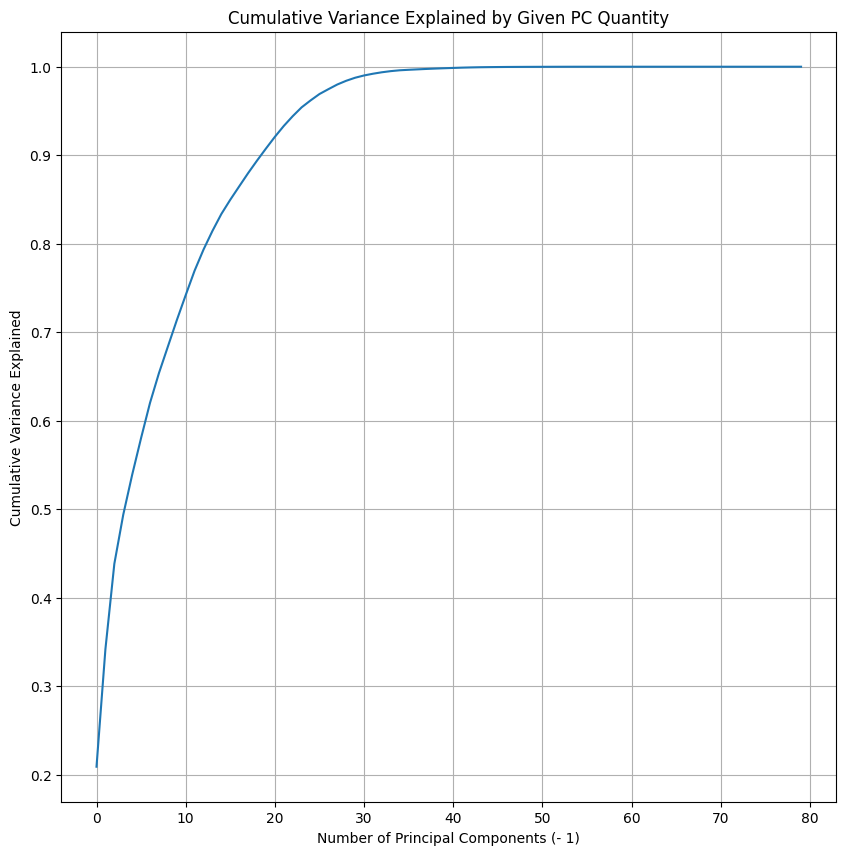

In [28]:
# Scale data in preparation for PCA
df_pca = X.copy()
df_scaled = StandardScaler().fit_transform(df_pca)

# default PCA value is a number of components equal to the number of features. We also get the cumulative variance explained by each quantity of PCs.
pca_all_fitted = PCA(random_state=42).fit(df_scaled)
explained_variance_cumulative = np.cumsum(pca_all_fitted.explained_variance_ratio_)

# Plot the curve of PCA components to explained variance  
plt.figure(figsize=(10,10)) 
plt.plot(explained_variance_cumulative)   
plt.grid() 
plt.xlabel('Number of Principal Components (- 1)') 
plt.ylabel('Cumulative Variance Explained')  
plt.title('Cumulative Variance Explained by Given PC Quantity')
plt.show()

In [31]:
variance = 0.999
test_pca = PCA(random_state=42, n_components=variance).fit_transform(df_scaled)
print(f"PCA with explained variance threshold of {variance} results in {test_pca.shape[1]} PCs.")

PCA with explained variance threshold of 0.999 results in 43 PCs.


MultiClass

In [14]:
# Encode attack labels to int and save as dictionary to be used later.
mc = multiclass.copy()
le = LabelEncoder()
mc[" Label"] = le.fit_transform(mc[" Label"].values)

label_dict = {}
print("Label Encodings: ")
for i in range(0, 11):
    label_dict[le.inverse_transform([i])[0]] = i

print(label_dict)

Label Encodings: 
{'DNS': 0, 'LDAP': 1, 'MSSQL': 2, 'NTP': 3, 'NetBIOS': 4, 'Portmap': 5, 'SNMP': 6, 'SSDP': 7, 'Syn': 8, 'TFTP': 9, 'UDP': 10}


Correlation Based Feature Selection (one at a time, Pearson, thresh 0.2). Aggregates all features that have thresh correlation between any attack type and the target.

In [16]:
thresh = 0.2
include = []
exclude = []

for i in range(0, 12):
    # construct new dataframe of benign data and attack data from this category so we can get a correlation.
    attack_df = pd.concat([mc[mc[" Label"] == i], binary[binary[" Label"] == 0]])
    corrMatrix = attack_df.corr("pearson")
    for index, row in corrMatrix.iterrows():
        if (abs(row[" Label"]) > thresh) and (index not in include):
            include.append(index)

for val in mc.columns:
    if val not in include:
        exclude.append(val)

print(f"Correlation based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")

Correlation based feature selection using threshold of 0.2:

Included (39 features): [' Protocol', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s', 'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' URG Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Subflow Fwd Bytes', ' Inbound', ' Label', ' Total Fwd Packets', 'Subflow Fwd Packets', ' act_data_pkt_fwd', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Mean', ' Fwd IAT Std', ' min_seg_size_forward', ' Flow Duration', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Max', ' Bwd IAT Mean', ' Bwd IAT Std', ' ACK Flag Count', 'Idle Mean', ' Idle Std', ' Idle Max', ' Fwd Header Length', ' Fwd Header Length.1']

Excluded (42 features): [' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Len

Mutual Information

In [17]:
y = mc[" Label"].copy()
X = mc.drop([" Label"], axis = 1)

scores = mutual_info_classif(X, y, random_state=42)

# Collect all features and their scores.
feature_list = []

for i, col in enumerate(X.columns):
    feature_list.append((col, scores[i]))

# Sort features by MI score in descending order.
sorted_feature_list = sorted(feature_list, key=lambda tup: tup[1], reverse=True)

print("MI Scores in order of rank:")
# Print features in order of score.
for val in sorted_feature_list:
    print(f"{val[0]}: {val[1]}")

MI Scores in order of rank:
 Average Packet Size: 1.840294069841975
 Subflow Fwd Bytes: 1.803175182345272
Total Length of Fwd Packets: 1.801460881529285
 Packet Length Mean: 1.79498570969576
 Fwd Packet Length Mean: 1.7789006798475129
 Avg Fwd Segment Size: 1.776422675665787
 Max Packet Length: 1.766978662265831
 Fwd Packet Length Min: 1.7656028957299899
 Fwd Packet Length Max: 1.7651791447742382
 Min Packet Length: 1.7646552296600158
Flow Bytes/s: 1.5983875727335244
 Flow IAT Mean: 1.3042488050036374
 Flow Duration: 1.298556926347275
 Flow Packets/s: 1.2925791051780209
Fwd Packets/s: 1.2911872204974943
Fwd IAT Total: 1.2867253982083233
 Fwd IAT Mean: 1.2787245914767564
 Flow IAT Std: 1.2631541034835871
 Fwd IAT Std: 1.2358160082268217
 Flow IAT Max: 1.20834072857875
 Fwd IAT Max: 1.2017536854938453
 Fwd Header Length.1: 1.0299978240406076
 Fwd Header Length: 1.0290373045677756
 act_data_pkt_fwd: 0.8919939702713062
 Total Fwd Packets: 0.7984967958027629
Subflow Fwd Packets: 0.797637108

In [18]:
# Apply threshold to get feature list
thresh = 0.1
include = []
exclude = []

for elem in feature_list:
    if elem[1] > thresh:
        include.append(elem[0])
    else:
        exclude.append(elem[0])

print(f"Mutual information based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")

Mutual information based feature selection using threshold of 0.1:

Included (59 features): [' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' ACK Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', '

Principal Component Analysis

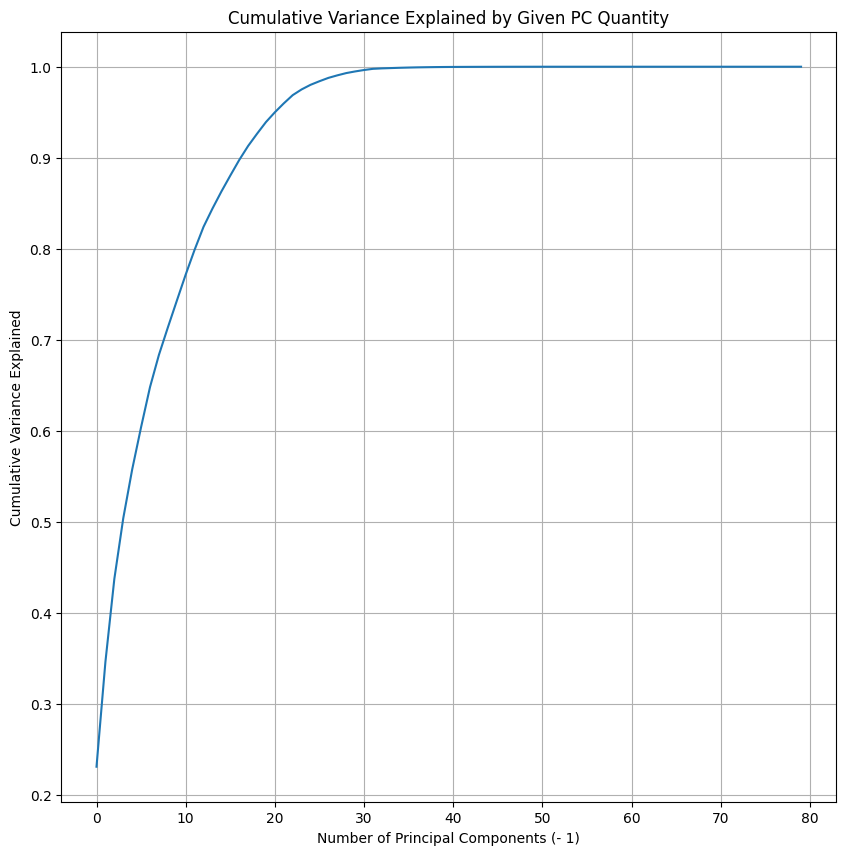

In [33]:
# Scale data in preparation for PCA
df_pca = X.copy()
df_scaled = StandardScaler().fit_transform(df_pca)

# default PCA value is a number of components equal to the number of features. We also get the cumulative variance explained by each quantity of PCs.
pca_all_fitted = PCA(random_state=42).fit(df_scaled)
explained_variance_cumulative = np.cumsum(pca_all_fitted.explained_variance_ratio_)

# Plot the curve of PCA components to explained variance  
plt.figure(figsize=(10,10)) 
plt.plot(explained_variance_cumulative)   
plt.grid() 
plt.xlabel('Number of Principal Components (- 1)') 
plt.ylabel('Cumulative Variance Explained')  
plt.title('Cumulative Variance Explained by Given PC Quantity')
plt.show()

In [34]:
variance = 0.999
test_pca = PCA(random_state=42, n_components=variance).fit_transform(df_scaled)
print(f"PCA with explained variance threshold of {variance} results in {test_pca.shape[1]} PCs.")

PCA with explained variance threshold of 0.999 results in 36 PCs.
